# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [96]:
import pandas as pd
import numpy as np
import os

In [97]:
datasets_dir = r'..\..\python-ml-course-master\datasets'

In [98]:
filepath = datasets_dir + os.sep + r"ads/Advertising.csv"
data = pd.read_csv(filepath)
data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [99]:
import statsmodels.formula.api as smf

In [100]:
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [101]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería
Sales= 7.032594 + 0.047537 * TV

In [102]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [103]:
lm.rsquared

0.611875050850071

In [104]:
lm.rsquared_adj

0.6099148238341623

In [105]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        12:05:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred 

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [107]:
import matplotlib.pyplot as plt

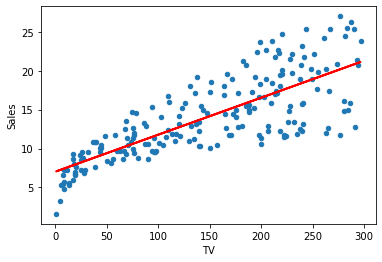

In [108]:
%matplotlib inline
data.plot(kind = "scatter", x="TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth=2)

In [109]:
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]

In [110]:
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

In [111]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [112]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [113]:
# Que representa ese error RSE con respecto a la media de las ventas
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [114]:
error = (RSE/sales_m) * 100 
error
# NOTA 23% de error es mucho. ¿Como se puede mejorar? ¿Como mejorar r2 y reducir la suma de los errores residuales?
# El r2 era de 0.62 no se puede mejorar mucho.
# Quizas nuestro modelo no debería basase unicamente en la TV. ¿Como introducir Radio y periodico en el model?

23.23876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

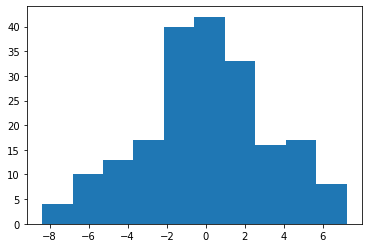

In [115]:
plt.hist(data["Sales"] - data["sales_pred"]) # IMPORTANTE residuos sin el cuadrado. Comprobamos la distribución normal

# Regresión lineal multiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [116]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [117]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [118]:
lm2.pvalues
# Estos valores pequeños y distintos de cero (en este caso por ir multiplicando los coeficientes) sugieren un modelo robusto.

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

In [119]:
lm2.rsquared

0.6458354938293271

In [120]:
lm2.rsquared_adj

0.6422399150864777

In [121]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [122]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

1918.561811896827

In [123]:
RSE = np.sqrt(SSD/(len(data-2-1)))   # 3 porque es las variables (TV y newspaper) más uno
RSE

3.097226026541191

In [124]:
error = RSE / sales_m
error

0.22087545206212805

In [125]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           3.95e-45
Time:                        12:05:43   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TV+Periodico baja el valor P y F decrecen con respecto a la TV solo. Deducimos que mejora, aunque no mucho más.
r2 y r2_adj ha aumentado unas decimas

In [126]:
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [127]:
lm3.rsquared # Cuanto más grande mejor, más proximo a 1

0.8971942610828957

In [128]:
lm3.rsquared_adj # Cuanto más grande mejor, más proximo a 1

0.8961505479974429

In [129]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [130]:
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [131]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        12:05:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [133]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

556.9139800676182

In [136]:
RSE = np.sqrt(SSD/(len(data-2-1)))   # 3 porque es las variables (TV y newspaper) más uno
RSE # Ha bajado a la mitad. Ha mejorado.

1.6687030593661927

In [137]:
RSE/sales_m # Ha bajado a un 11% que se queda sin explicar, ha mejorado

0.1190018227396108

### Radio + TV + Periodico

In [160]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [161]:
lm4.rsquared

0.8972106381789522

In [162]:
lm4.rsquared_adj

0.8956373316204668

In [163]:
lm4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [164]:
lm4.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [165]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        12:14:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
sales_pred = lm4.predict(data[["TV", "Radio", "Newspaper"]])
sales_pred

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

In [167]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

556.8252629021874

In [168]:
RSE = np.sqrt(SSD/(len(data-3-1)))
RSE 

1.66857014072257

In [169]:
RSE/sales_m

0.11899234378481509

## Multicolinearidad

Cuando dos variables guardan una relación entre si puede perjudicar el modelo. Eso se observa en la matriz de covarianzas.
Hay que calcular el factor de inflación de la covarianza.

* Si VIF es 1 no estan correlacionadas
* Si VIF es menor de 5 la correlación es moderada y se puede usar en el modelo
* Si VIF es mayor de 5 estan fuertemente correlacionadas y deben desaparecer del modelo

In [171]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2) 

In [174]:
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [172]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)

In [175]:
lm_t = smf.ols(formula="TV~Newspaper+Radio", data = data).fit()
rsquared_t = lm_t.rsquared
VIF = 1/(1-rsquared_t)
VIF

1.0046107849396502

In [173]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)

In [176]:
lm_r = smf.ols(formula="Radio~Newspaper+TV", data = data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

In [178]:
# De todos los modelos el mejor es el de TV y la Radio
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        12:30:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""